In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [9]:
def weighted_average(group):
    weights = group['TotalPopulation']
    exclude_cols = ['Unnamed: 0', 'StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation', 'Geolocation']
    weighted_values = group.drop(exclude_cols, axis=1).multiply(weights, axis=0)
    weighted_sum = weighted_values.sum()
    total_weights = weights.sum()
    return weighted_sum / total_weights

data_files = [
    "./data/PLACES__County_Data__GIS_Friendly_Format___2020_release_filtered.csv",
    "./data/PLACES__County_Data__GIS_Friendly_Format___2021_release_filtered.csv",
    "./data/PLACES__County_Data__GIS_Friendly_Format___2022_release_filtered.csv",
    "./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107_filtered.csv"
]

years = [2020, 2021, 2022, 2023]
san_diego = []
california = []
average = []


for filename in data_files:
    df = pd.read_csv(filename)
    filtered_col_names = df.columns

    wo_fl = df[df["StateDesc"] != "Florida"]
    clean_df = wo_fl[wo_fl["StateDesc"] != "District of Columbia"]
    sd_rate = clean_df[clean_df["CountyName"] == "San Diego"]['OBESITY_AdjPrev'].iloc[0]
    san_diego.append(sd_rate)

    state_df = clean_df.groupby('StateDesc').apply(weighted_average).reset_index()

    california_rate = state_df[state_df["StateDesc"] == "California"]['OBESITY_AdjPrev'].iloc[0]
    california.append(california_rate)

    weighted_mean = (clean_df['OBESITY_AdjPrev'] * clean_df['TotalPopulation']).sum() / clean_df['TotalPopulation'].sum()
    average.append(weighted_mean)



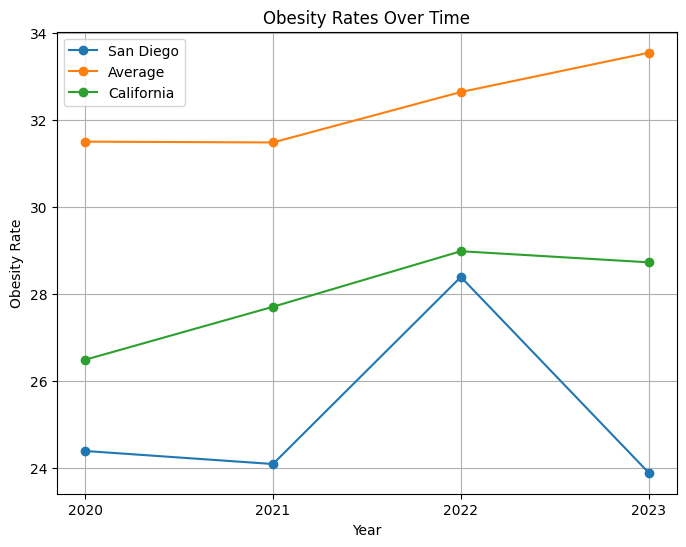

In [15]:
data = {'Years': years, 'San Diego': san_diego, 'Average': average, 'California': california}
df = pd.DataFrame(data)

df['Years'] = df['Years'].astype(str)


# Plotting the data
plt.figure(figsize=(8, 6))

# Plotting values against years
for col in df.columns[1:]:
    plt.plot(df['Years'], df[col], marker='o', label=col)

plt.title('Obesity Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Obesity Rate')
plt.legend()
plt.grid(True)
plt.show()